# Response to the hints

1. The priors and posteriors p(theta j) will always be in beta distributions.
2. Data: Win or lose for one game follows Bernoulli distribution, while the number of wins after playing for several rounds will follow the binomial distribution. 
3. Posterior update will following alpha = x + alpha and beta = n - x + beta. 
4. Repeatedly comparing sampled values from the posterior distribution implies which game is most likely to win.
5. **Exploration versus exploitation**: It's not wise to stick to the game just because it shows advantage initially, so is to wander around different games while already knowing the best option. As the computational resource is limited, it's important to balance exploration and exploitation. In my algorithm, I will start with play each game one time, and then only play n rounds of a game every time it show an advantage in its posterior distributions. The more the game progress, the more accurate our estimation is, making it's more reasonable to exploit instead of explore. 

# process breakdown

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random

## functions

In [2]:

def update_posteriors(alpha,beta,posteriors,game=None):
    posteriors[game] = stats.beta(alpha[game], beta[game])
    
    #output posteriors
    for i in range(3):
        print(f'Posterior {game_array[i]} = beta ({alpha[i]},{beta[i]})')
    #visualize posteriors
    plt.plot(parameter_domain, posteriors[0].pdf(parameter_domain), 
             label='Posterior A', color='red')  
    plt.plot(parameter_domain, posteriors[1].pdf(parameter_domain), 
             label='Posterior B', color='blue', linestyle=("-."))  
    plt.plot(parameter_domain, posteriors[2].pdf(parameter_domain), 
             label='Posterior C', color='green', linestyle='--')  
    plt.legend()
    plt.show()    
    return posteriors

def sample_posteriors(posteriors):
    sample=[]
    for i in range(3):
        sample.append(posteriors[i].rvs())
    print("Sampling from each posterior distribution, we get ",sample)
    max_sample = max(sample)
    game=sample.index(max_sample)
    print(f"let's play game {game_array[game]}")
    print(" ")
    return game

def play_games(alpha, beta, game):
    # a. Simulate playing the game j for n times using binomial distribution. 
    # b. model the likelihood of winning with binomial distribution given trials n and the number of wins x.
    outcome=stats.binom(n=2,p=p[game]).rvs()
    print("I won",outcome, "out of 2 games in", game_array[game])
    # b. Update the posterior distribution for game j using the formula alpha = x + alpha and beta = n - x + beta.
    alpha[game]=outcome+alpha[game]
    beta[game]=n-outcome+beta[game]
    return alpha, beta

def if_perfect(posteriors):
    game=sample_posteriors(posteriors)
    for i in range(4):
        if sample_posteriors(posteriors)!=game: 
            print("\nThe advantage is not consistent")
            return [False,game]
            break #stop the loop while a different answer is given
    return [True, game]

# 1. Initialization

In [3]:
# a. defining the true success rate (thetas) for each games 
n=2
p=[]
parameter_domain = np.linspace(0,1,101)
game_array=["A","B","C"]

for i in range(3):
    p.append(round(np.random.random(), 1)) 

In [4]:
# b. set prior as a beta distribution with alpha=beta=1, equavalent to a uniform distribution. 

alpha = [1,1,1] # use array to represent the triplets of alpha and beta. 
beta = [1,1,1]
posteriors=[0,0,0] # The priors are named as posterior_j, as their values will be updated into posteriors 
for i in range(3):
    posteriors[i] = stats.beta(alpha[i], beta[i])

# 2. Primary Exploration

I won 2 out of 2 games in A
Posterior A = beta (3,1)
Posterior B = beta (1,1)
Posterior C = beta (1,1)


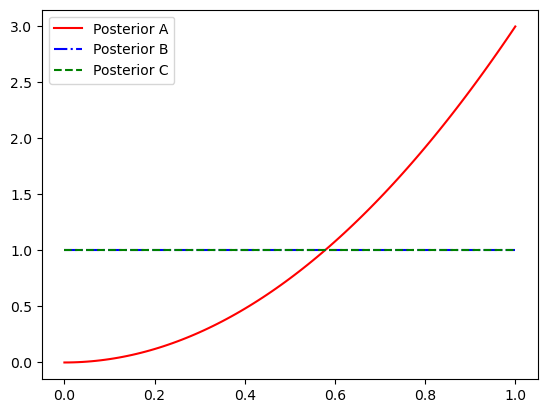

I won 1 out of 2 games in B
Posterior A = beta (3,1)
Posterior B = beta (2,2)
Posterior C = beta (1,1)


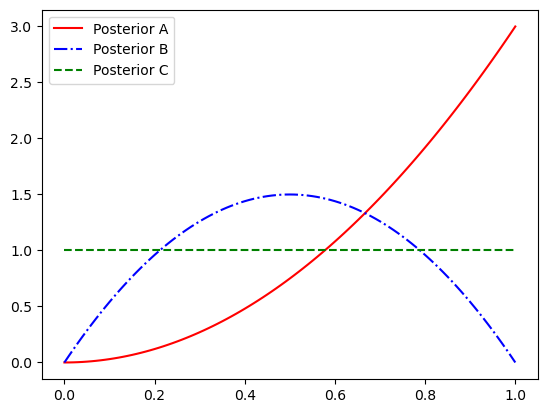

I won 1 out of 2 games in C
Posterior A = beta (3,1)
Posterior B = beta (2,2)
Posterior C = beta (2,2)


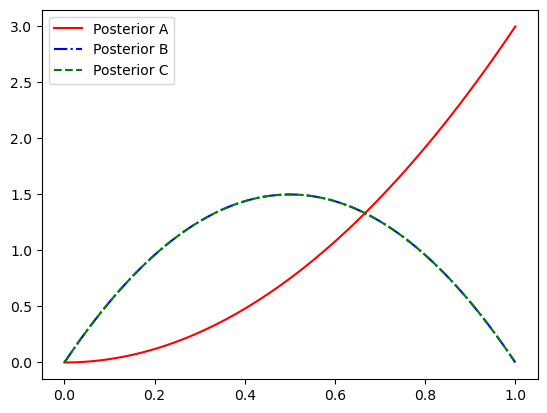

In [5]:
# play each game once and update posteriors each time

for game in range(3):
    alpha,beta=play_games(alpha, beta, game)
    posteriors=update_posteriors(alpha,beta,posteriors,game)

# 3. Exploitation

Sampling from each posterior distribution, we get  [0.6770695621902342, 0.27927614764485953, 0.550381028030192]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (5,1)
Posterior B = beta (2,2)
Posterior C = beta (2,2)


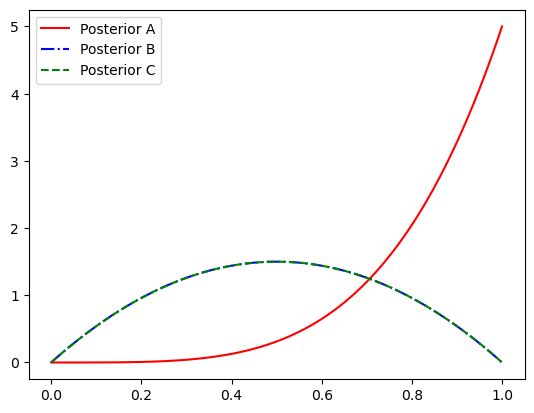

Sampling from each posterior distribution, we get  [0.9172480435637731, 0.46710155352107174, 0.46347589060026956]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (7,1)
Posterior B = beta (2,2)
Posterior C = beta (2,2)


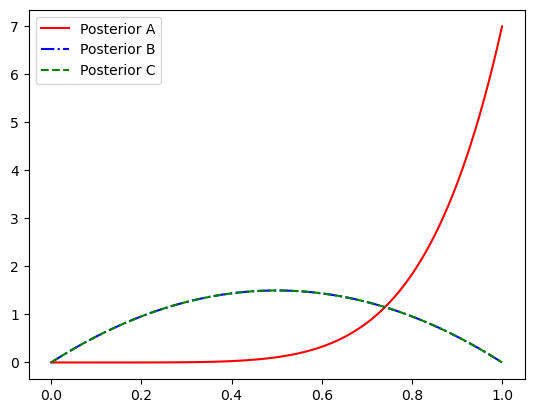

Sampling from each posterior distribution, we get  [0.720599370332941, 0.4621348804580492, 0.6348863958092424]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (9,1)
Posterior B = beta (2,2)
Posterior C = beta (2,2)


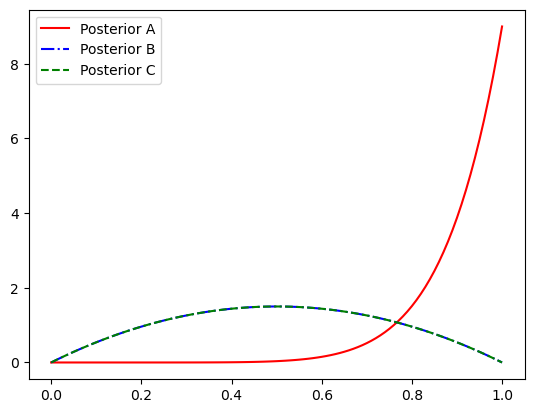

Sampling from each posterior distribution, we get  [0.9587663731991902, 0.511032844299039, 0.3853497710109685]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (11,1)
Posterior B = beta (2,2)
Posterior C = beta (2,2)


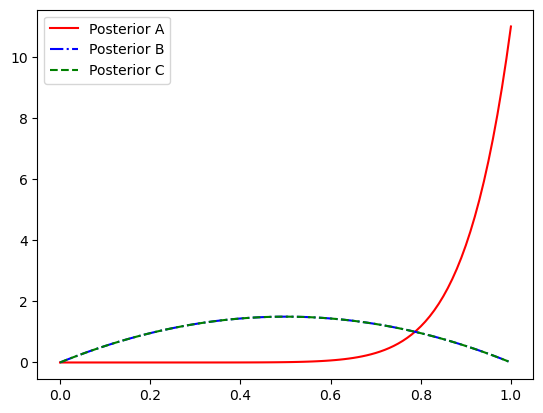

Sampling from each posterior distribution, we get  [0.9506190390765199, 0.6136770673942167, 0.9560056155091743]
let's play game C
 
I won 2 out of 2 games in C
Posterior A = beta (11,1)
Posterior B = beta (2,2)
Posterior C = beta (4,2)


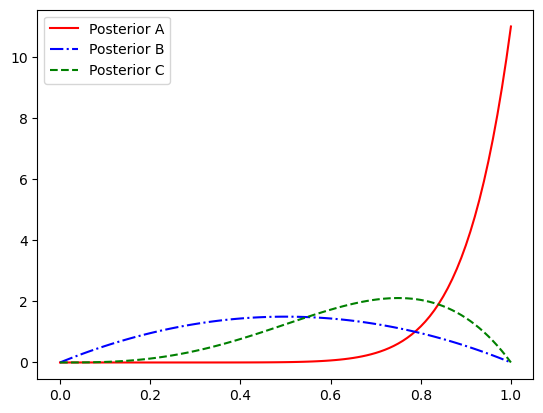

Sampling from each posterior distribution, we get  [0.8848465698958791, 0.8360065345184516, 0.7886355593210681]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (13,1)
Posterior B = beta (2,2)
Posterior C = beta (4,2)


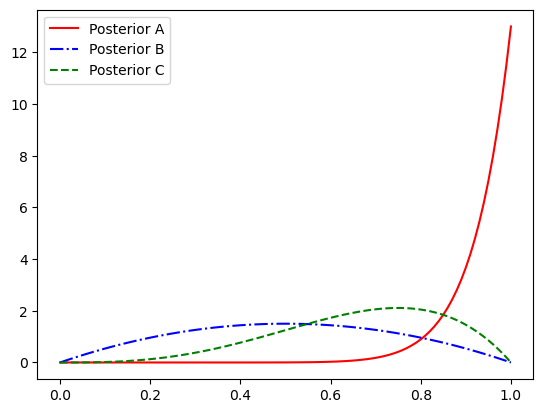

Sampling from each posterior distribution, we get  [0.9529349683195127, 0.4305500287209262, 0.5967148413499727]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (15,1)
Posterior B = beta (2,2)
Posterior C = beta (4,2)


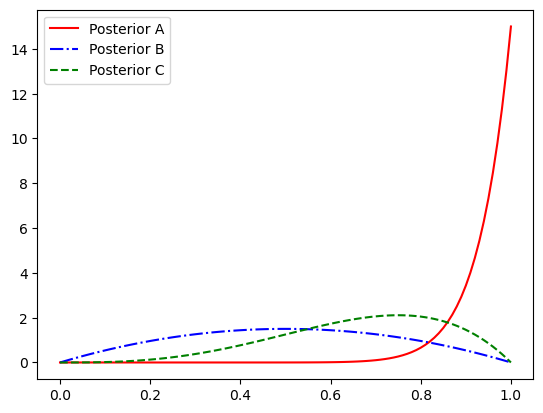

Sampling from each posterior distribution, we get  [0.9341908234594041, 0.3620934975649715, 0.9358411088043674]
let's play game C
 
I won 1 out of 2 games in C
Posterior A = beta (15,1)
Posterior B = beta (2,2)
Posterior C = beta (5,3)


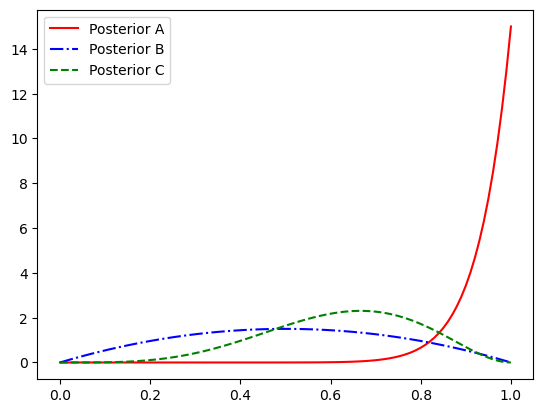

Sampling from each posterior distribution, we get  [0.9928858068805194, 0.2881361114649031, 0.4482564880591453]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (17,1)
Posterior B = beta (2,2)
Posterior C = beta (5,3)


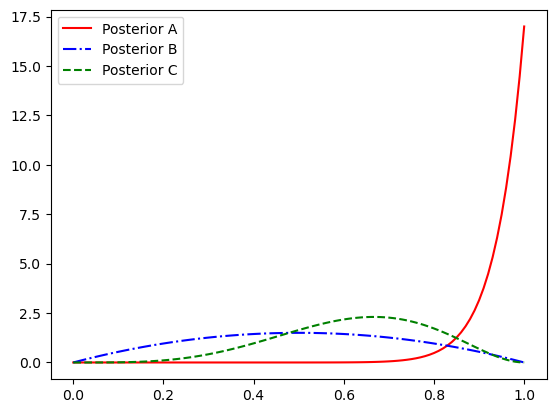

Sampling from each posterior distribution, we get  [0.9909254727628719, 0.4815082575137172, 0.6188508669707257]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (19,1)
Posterior B = beta (2,2)
Posterior C = beta (5,3)


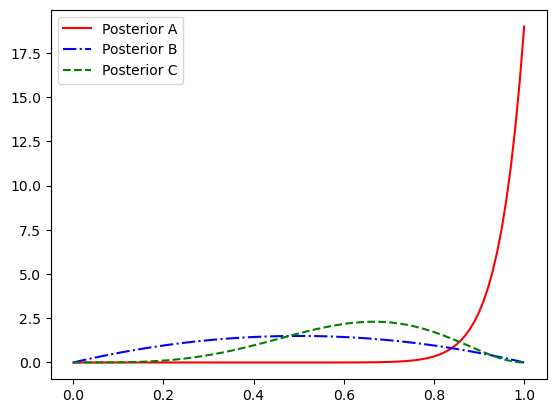

Sampling from each posterior distribution, we get  [0.9526637213563088, 0.7211920892177672, 0.5188380527162502]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (21,1)
Posterior B = beta (2,2)
Posterior C = beta (5,3)


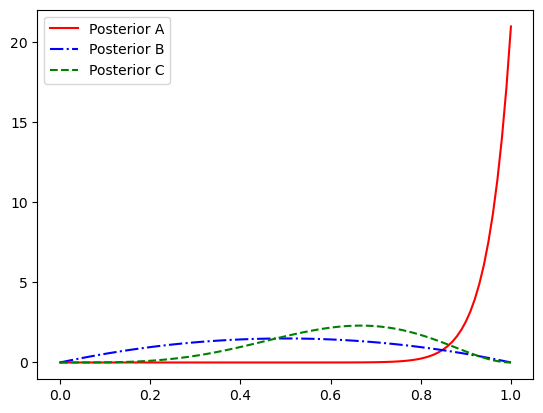

Sampling from each posterior distribution, we get  [0.8564625969665454, 0.5420921449507243, 0.5536406077930385]
let's play game A
 
Sampling from each posterior distribution, we get  [0.9987870664205777, 0.841300901232728, 0.6127087274150801]
let's play game A
 
Sampling from each posterior distribution, we get  [0.9670938999444092, 0.6746248327427508, 0.612466088425361]
let's play game A
 
Sampling from each posterior distribution, we get  [0.8587834506461668, 0.8835289730514214, 0.8012612097482738]
let's play game B
 

The advantage is not consistent
Sampling from each posterior distribution, we get  [0.9897778229405864, 0.5272982187492479, 0.7053790603531016]
let's play game A
 
I won 2 out of 2 games in A
Posterior A = beta (23,1)
Posterior B = beta (2,2)
Posterior C = beta (5,3)


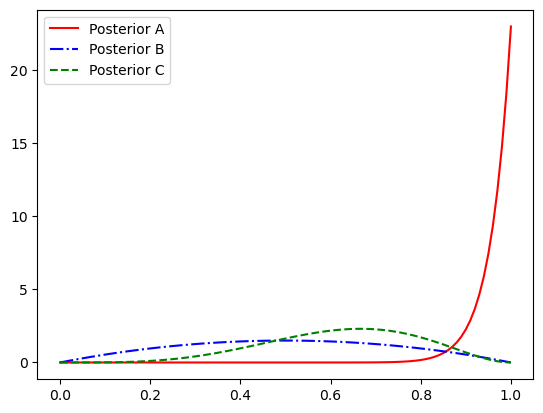

Sampling from each posterior distribution, we get  [0.9670882186826169, 0.7092601833090967, 0.7605141601272168]
let's play game A
 
Sampling from each posterior distribution, we get  [0.9141653489105468, 0.20089090588942538, 0.537587947056163]
let's play game A
 
Sampling from each posterior distribution, we get  [0.9998512966412065, 0.6298480595388598, 0.20312157227946082]
let's play game A
 
Sampling from each posterior distribution, we get  [0.949972308969434, 0.4012613012882468, 0.6937784615160251]
let's play game A
 
Sampling from each posterior distribution, we get  [0.9965044505681065, 0.27865375513751295, 0.6863505788090122]
let's play game A
 


In [6]:
# Sample a value from each prior distribution and play the one with the highest success rate

for i in range(10):
    game=sample_posteriors(posteriors)     # using sampling to decide which game to play
    alpha,beta=play_games(alpha,beta,game)
    posteriors=update_posteriors(alpha,beta,posteriors,game)

iterations=0
perfect=False # if one posterior distribution show deviance agianst other two.
while iterations<10 and perfect==False: # Repeat the process until significant differences are observed or the player decide to terminate. 
    iterations += 1
    game=sample_posteriors(posteriors)     # using sampling to decide which game to play
    alpha,beta=play_games(alpha,beta,game)
    posteriors=update_posteriors(alpha,beta,posteriors,game)
    perfect,game=if_perfect(posteriors)

# 4. Verification

In [7]:
print(f"The code advise you to play game {game_array[game]}")
print(f"!!!Reveal: the true probabilities are {p} !!!")
if p[game]==max(p):
    success=True
    print("Bingo")
else:
    print("Sorry")

The code advise you to play game A
!!!Reveal: the true probabilities are [0.9, 0.5, 0.7] !!!
Bingo
